# ***Novice Programmers Lecture 5: Statistics and graphs***
---

Lecture Series

Fahad S. Ahmed, MBBS, MD, ABAIM

---

Lecture 1: Computer literacy

Lecture 2: Programming Languages

Lecture 3: Python coding 1: Basics

Lecture 4: Python coding 2: Files and folders

Lecture 5: Python coding 3: Statistics and graphs

Lecture 6: Python coding 4: Web Development

**Lecture 7: Python coding 5: Basic Machine Learning**

In [1]:
# Import necessary libraries
import numpy as np  # Import NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib library for visualization
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn
from sklearn.linear_model import LinearRegression  # Import LinearRegression class from scikit-learn
from sklearn.metrics import mean_squared_error  # Import mean_squared_error function from scikit-learn

In [2]:
# Generate some sample data or load data
np.random.seed(0)  # Set the random seed for reproducibility
X = 2 * np.random.rand(100, 1)  # Generate 100 random numbers between 0 and 2 and reshape into a column vector
y = 3 * X + 4 + np.random.randn(100, 1)  # Generate y values using a linear equation with some noise

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and testing sets with 80% for training and 20% for testing

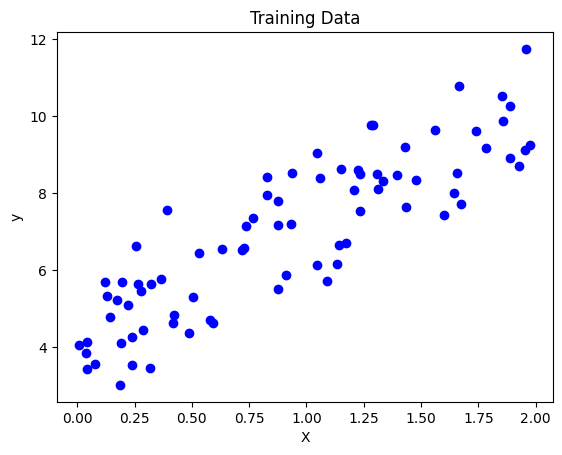

In [4]:
# Visualize the training data
plt.scatter(X_train, y_train, color='blue')  # Plot the training data points
plt.title('Training Data')  # Set the title of the plot
plt.xlabel('X')  # Label the x-axis
plt.ylabel('y')  # Label the y-axis
plt.show()  # Display the plot

In [5]:
# Initialize the linear regression model
model = LinearRegression()  # Create an instance of the LinearRegression class

In [6]:
# Train the model on the training data
model.fit(X_train, y_train)  # Fit the model to the training data

LinearRegression()

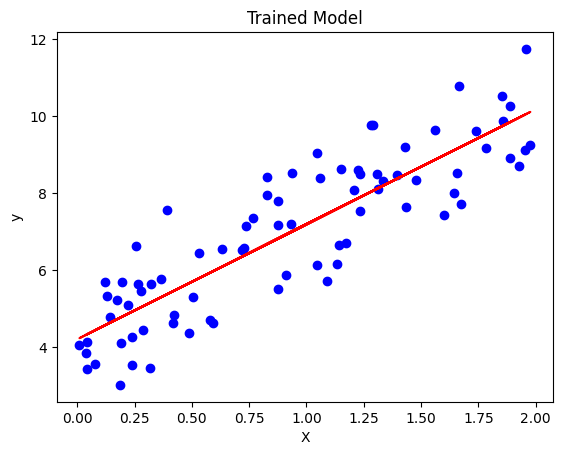

In [7]:
# Visualize the trained model
plt.scatter(X_train, y_train, color='blue')  # Plot the training data points
plt.plot(X_train, model.predict(X_train), color='red')  # Plot the regression line using the trained model
plt.title('Trained Model')  # Set the title of the plot
plt.xlabel('X')  # Label the x-axis
plt.ylabel('y')  # Label the y-axis
plt.show()  # Display the plot

In [8]:
# Make predictions on the testing data
predictions = model.predict(X_test)  # Use the trained model to make predictions on the testing data

In [9]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)  # Calculate the mean squared error between actual and predicted values
print("Mean Squared Error:", mse)  # Print the mean squared error

Mean Squared Error: 0.9177532469714291


In [11]:
# Convert predictions to binary classification
threshold = 7  # Threshold value
binary_predictions = (predictions > threshold).astype(int)  # Convert predictions above threshold to 1, below to 0

# Convert true labels to binary classification
binary_true_labels = (y_test > threshold).astype(int)  # Convert true labels above threshold to 1, below to 0

# Calculate true positives, true negatives, false positives, and false negatives
true_positives = np.sum((binary_predictions == 1) & (binary_true_labels == 1))  # Count instances where both prediction and true label are 1
true_negatives = np.sum((binary_predictions == 0) & (binary_true_labels == 0))  # Count instances where both prediction and true label are 0
false_positives = np.sum((binary_predictions == 1) & (binary_true_labels == 0))  # Count instances where prediction is 1 but true label is 0
false_negatives = np.sum((binary_predictions == 0) & (binary_true_labels == 1))  # Count instances where prediction is 0 but true label is 1

# Calculate sensitivity, specificity, PPV, and NPV
sensitivity = true_positives / (true_positives + false_negatives)  # Calculate sensitivity (true positive rate)
specificity = true_negatives / (true_negatives + false_positives)  # Calculate specificity (true negative rate)
ppv = true_positives / (true_positives + false_positives)  # Calculate positive predictive value (precision)
npv = true_negatives / (true_negatives + false_negatives)  # Calculate negative predictive value

# Calculate AUROC
from sklearn.metrics import roc_auc_score  # Import function for calculating AUROC
auroc = roc_auc_score(binary_true_labels, predictions)  # Calculate AUROC using true labels and predicted probabilities

# Print the results
print("Sensitivity:", sensitivity)  # Print sensitivity
print("Specificity:", specificity)  # Print specificity
print("Positive Predictive Value (PPV):", ppv)  # Print PPV
print("Negative Predictive Value (NPV):", npv)  # Print NPV
print("Area Under the ROC Curve (AUROC):", auroc)  # Print AUROC


Sensitivity: 0.8333333333333334
Specificity: 0.75
Positive Predictive Value (PPV): 0.8333333333333334
Negative Predictive Value (NPV): 0.75
Area Under the ROC Curve (AUROC): 0.8854166666666667


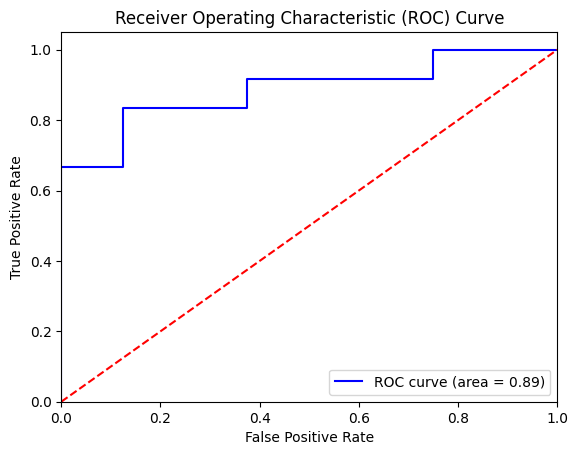

Area Under the ROC Curve (AUROC): 0.8854166666666667


In [12]:
# Calculate AUROC
from sklearn.metrics import roc_curve  # Import function for calculating ROC curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(binary_true_labels, predictions)

# Calculate AUROC
auroc = roc_auc_score(binary_true_labels, predictions)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUROC
print("Area Under the ROC Curve (AUROC):", auroc)
